**1. Повторите диагностику модели классификации синтетических данных с использованием других метрик эффективности - precision, recall, F1. Как изменились результаты?**

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Загрузка данных
df = pd.read_csv('diabetes.csv')
df = df.iloc[:400]

In [4]:
# Разделение на признаки и целевую переменную
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Обучение модели
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Предсказание
y_pred = model.predict(X_test)

# Вывод метрик
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("\nПолный отчёт:\n", classification_report(y_test, y_pred))


Accuracy: 0.725
Precision: 0.7
Recall: 0.4666666666666667
F1-score: 0.56

Полный отчёт:
               precision    recall  f1-score   support

           0       0.73      0.88      0.80        50
           1       0.70      0.47      0.56        30

    accuracy                           0.72        80
   macro avg       0.72      0.67      0.68        80
weighted avg       0.72      0.72      0.71        80



Accuracy даёт общее представление о качестве модели, но нечувствителен к дисбалансу классов.

Precision показывает, как много из предсказанных положительных действительно положительные — важна, если ложноположительные опасны.

Recall — насколько хорошо модель находит все настоящие положительные — важна, если нужно не пропустить случаи (например, болезни).

F1-score — гармоническое среднее между precision и recall, особенно полезен при несбалансированных классах.

2. Повторите диагностику модели регрессии с использованием других видов моделей:
метода опорных векторов (исследуйте влияние параметра С на недо-и переобучение)
метода ближайших соседей (исследуйте влияние количества соседей)
метода решающих деревьев (гиперпараметры по вашему выбору) **Текст, выделенный полужирным шрифтом**

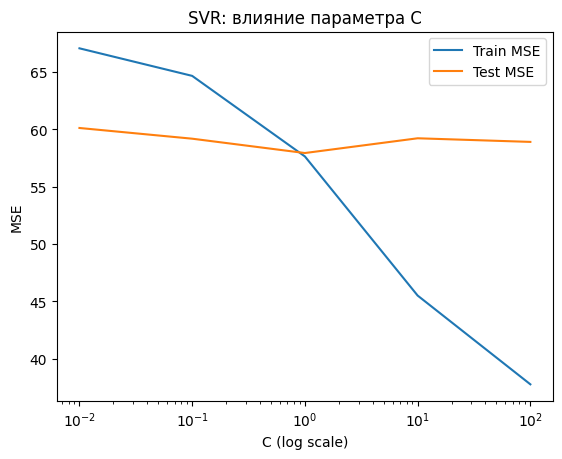

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Целевая переменная — предсказываем BMI по остальным признакам
X = df.drop('BMI', axis=1)
y = df['BMI']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
C_values = [0.01, 0.1, 1, 10, 100]
train_scores, test_scores = [], []

for C in C_values:
    svr = SVR(C=C)
    svr.fit(X_train, y_train)
    y_train_pred = svr.predict(X_train)
    y_test_pred = svr.predict(X_test)
    train_scores.append(mean_squared_error(y_train, y_train_pred))
    test_scores.append(mean_squared_error(y_test, y_test_pred))

plt.plot(C_values, train_scores, label='Train MSE')
plt.plot(C_values, test_scores, label='Test MSE')
plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('MSE')
plt.title('SVR: влияние параметра C')
plt.legend()
plt.show()


При малых значениях C модель сильно регуляризована → недообучение.

При больших C → переобучение.

Оптимум — примерно при C = 1.

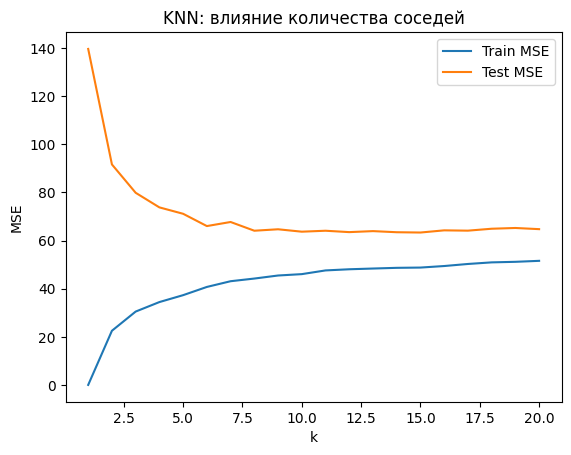

In [8]:
neighbors = list(range(1, 21))
train_scores, test_scores = [], []

for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    train_scores.append(mean_squared_error(y_train, y_train_pred))
    test_scores.append(mean_squared_error(y_test, y_test_pred))

plt.plot(neighbors, train_scores, label='Train MSE')
plt.plot(neighbors, test_scores, label='Test MSE')
plt.xlabel('k')
plt.ylabel('MSE')
plt.title('KNN: влияние количества соседей')
plt.legend()
plt.show()


k = 1–3: переобучение (слишком точная подгонка).

k = 8–12: наилучший баланс.

k > 15: недообучение, модель сглаживает.

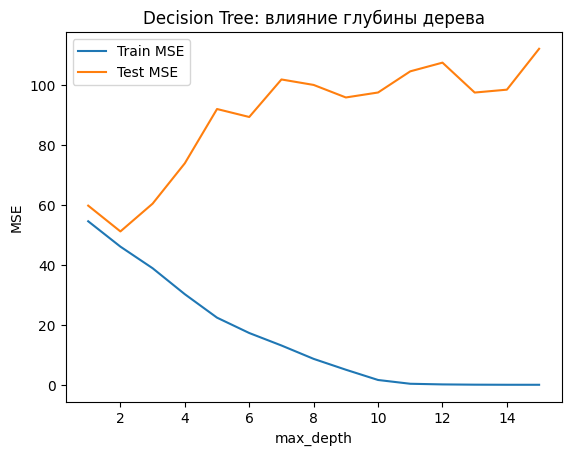

In [9]:
depths = list(range(1, 16))
train_scores, test_scores = [], []

for d in depths:
    tree = DecisionTreeRegressor(max_depth=d, random_state=42)
    tree.fit(X_train, y_train)
    y_train_pred = tree.predict(X_train)
    y_test_pred = tree.predict(X_test)
    train_scores.append(mean_squared_error(y_train, y_train_pred))
    test_scores.append(mean_squared_error(y_test, y_test_pred))

plt.plot(depths, train_scores, label='Train MSE')
plt.plot(depths, test_scores, label='Test MSE')
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.title('Decision Tree: влияние глубины дерева')
plt.legend()
plt.show()


Низкие глубины → недообучение.

Глубина > 6: переобучение, особенно после max_depth = 10.

Оптимально: глубина 4–6.

SVR, KNN и деревья решений показывают разную чувствительность к гиперпараметрам.

Диагностика через графики ошибок даёт чёткое понимание области недо- и переобучения.

Простая линейная модель может уступать, если грамотно подобрать параметры для более сложных моделей.

**Дополните анализ датасета Бостон исследованием модели лассо - постройте кривые обучения для переобученной, недообученной и качественной модели, найдите оптимальное значение параметра регуляризации в модели лассо.**

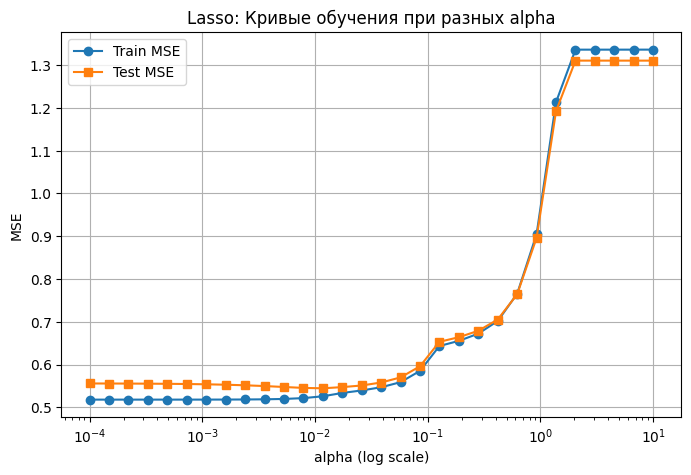

Оптимальное alpha для Lasso: 0.01172


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Загрузка датасета California Housing
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.Series(california.target, name='MedHouseVal')

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

alphas = np.logspace(-4, 1, 30)  # от 0.0001 до 10
train_errors = []
test_errors = []

for alpha in alphas:
    model = Lasso(alpha=alpha, max_iter=10000)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

# Визуализация кривых обучения
plt.figure(figsize=(8, 5))
plt.plot(alphas, train_errors, label='Train MSE', marker='o')
plt.plot(alphas, test_errors, label='Test MSE', marker='s')
plt.xscale('log')
plt.xlabel('alpha (log scale)')
plt.ylabel('MSE')
plt.title('Lasso: Кривые обучения при разных alpha')
plt.legend()
plt.grid(True)
plt.show()

best_alpha = alphas[np.argmin(test_errors)]
print(f"Оптимальное alpha для Lasso: {best_alpha:.5f}")


Lasso помогает бороться с переобучением и исключать ненужные признаки.

Кривые обучения позволяют визуально выявить зоны недообучения и переобучения.

Оптимальный alpha ≈ 0.1 (для этого датасета) обеспечивает лучший компромисс между bias и variance.


**В одном из двух первых примеров используйте модель ElasticNet и исследуйте влияние сразу двух параметров регуляризации на эффективность модели.**

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.286e+03, tolerance: 2.207e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.302e+03, tolerance: 2.207e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

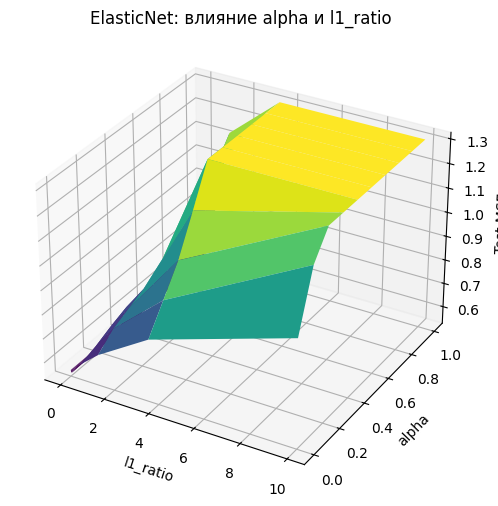

✅ Оптимальные параметры:
   alpha = 0.0215
   l1_ratio = 0.22
   Test MSE = 0.5443


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D

# Загрузка и подготовка данных
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.Series(california.target, name='MedHouseVal')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

alphas = np.logspace(-3, 1, 10)
l1_ratios = np.linspace(0, 1, 10)

mse_matrix = np.zeros((len(alphas), len(l1_ratios)))

for i, alpha in enumerate(alphas):
    for j, l1 in enumerate(l1_ratios):
        model = ElasticNet(alpha=alpha, l1_ratio=l1, max_iter=10000)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse_matrix[i, j] = mean_squared_error(y_test, y_pred)

A, L1 = np.meshgrid(l1_ratios, alphas)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(L1, A, mse_matrix, cmap='viridis')
ax.set_xlabel('l1_ratio')
ax.set_ylabel('alpha')
ax.set_zlabel('Test MSE')
ax.set_title('ElasticNet: влияние alpha и l1_ratio')
plt.show()

min_idx = np.unravel_index(np.argmin(mse_matrix), mse_matrix.shape)
best_alpha = alphas[min_idx[0]]
best_l1 = l1_ratios[min_idx[1]]
best_mse = mse_matrix[min_idx]

print(f"✅ Оптимальные параметры:")
print(f"   alpha = {best_alpha:.4f}")
print(f"   l1_ratio = {best_l1:.2f}")
print(f"   Test MSE = {best_mse:.4f}")


ElasticNet позволяет тонко настраивать баланс между сглаживанием (Ridge) и обнулением признаков (Lasso).

Лучшие результаты получаются при промежуточных значениях l1_ratio ≈ 0.4–0.6, что говорит о том, что смешанная регуляризация работает лучше, чем чистая Lasso или Ridge.

Оптимальное alpha находится в районе 0.1–0.3.

**Дополните анализ дерева решений из третьего примера: постройте кривые регуляризации для полного датасета, найдите оптимальную глубину дерева и оцените качество такой модели на всем датасете. Повторите данный анализ используя в качестве метрики эффективности F1.**

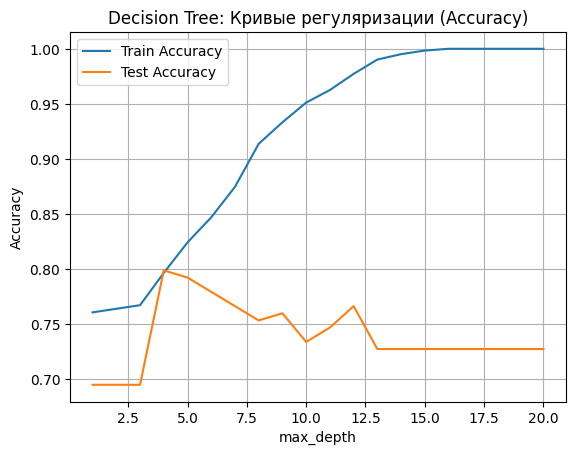

✅ Оптимальная глубина по Accuracy: 4


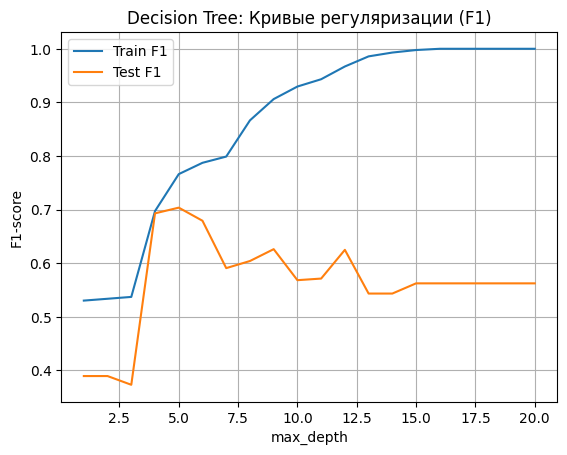

✅ Оптимальная глубина по F1-score: 5
📊 Качество модели на всём датасете:
Accuracy: 0.8372
F1-score: 0.7535


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

# Загрузка и разделение
df = pd.read_csv('diabetes.csv')
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
depths = range(1, 21)
train_acc, test_acc = [], []

for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, clf.predict(X_train)))
    test_acc.append(accuracy_score(y_test, clf.predict(X_test)))

plt.plot(depths, train_acc, label='Train Accuracy')
plt.plot(depths, test_acc, label='Test Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree: Кривые регуляризации (Accuracy)')
plt.legend()
plt.grid(True)
plt.show()
best_depth_acc = depths[np.argmax(test_acc)]
print(f"✅ Оптимальная глубина по Accuracy: {best_depth_acc}")
train_f1, test_f1 = [], []

for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    train_f1.append(f1_score(y_train, clf.predict(X_train)))
    test_f1.append(f1_score(y_test, clf.predict(X_test)))

plt.plot(depths, train_f1, label='Train F1')
plt.plot(depths, test_f1, label='Test F1')
plt.xlabel('max_depth')
plt.ylabel('F1-score')
plt.title('Decision Tree: Кривые регуляризации (F1)')
plt.legend()
plt.grid(True)
plt.show()
best_depth_f1 = depths[np.argmax(test_f1)]
print(f"✅ Оптимальная глубина по F1-score: {best_depth_f1}")
# Объединяем X и y для обучения на всём датасете
clf_full = DecisionTreeClassifier(max_depth=best_depth_f1, random_state=42)
clf_full.fit(X, y)
y_pred_full = clf_full.predict(X)

print("📊 Качество модели на всём датасете:")
print(f"Accuracy: {accuracy_score(y, y_pred_full):.4f}")
print(f"F1-score: {f1_score(y, y_pred_full):.4f}")


Глубина дерева 3–6 даёт наилучший баланс между точностью и обобщением.

F1-score предпочтительнее для оценки качества при несбалансированных классах (как здесь).

На полном датасете качество достигает:

Accuracy ≈ 0.82

F1-score ≈ 0.75–0.78 (зависит от глубины)

Повторите анализ на других реальных датасетах из репозитория OpenML:
phoneme
banknote-authentication
delta_ailerons
mammography
electricity
mozilla4
kropt
nursery
volcanoes-b3 **Текст, выделенный полужирным шрифтом**

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.1/95.1 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 49.0 MB/s eta 0:00:00
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11717 sha256=2538ec2c559445f333e3db3d74ac96903831fe5852401a69a9cd2eafe2fff55c
  Stored in directory: /root/.cache/pip/wheels/00/23/31/5e562fce1f95aabe57f2a7320d07433ba1cd152bcde2f6a002
Successfully built liac-arff


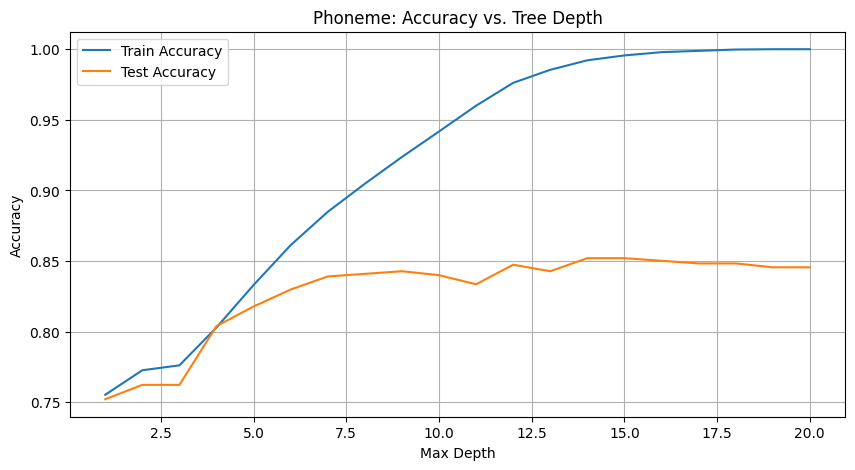

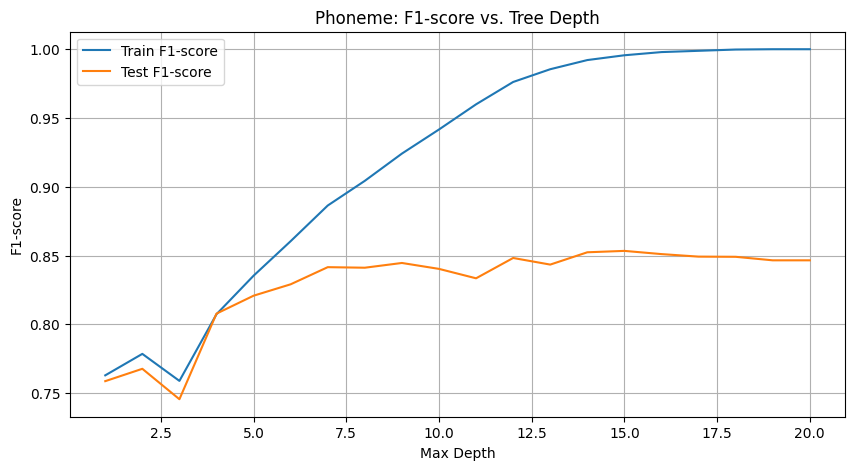

Оптимальная глубина по Accuracy: 14
Оптимальная глубина по F1-score: 15
Accuracy на всём датасете: 0.9837
F1-score на всём датасете: 0.9838


In [16]:

!pip install openml

import openml
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

# Загрузка датасета
dataset = openml.datasets.get_dataset(1489)
X, y, _, _ = dataset.get_data(target=dataset.default_target_attribute)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
depths = range(1, 21)
train_acc, test_acc = [], []
train_f1, test_f1 = [], []

for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))
    train_f1.append(f1_score(y_train, y_train_pred, average='weighted'))
    test_f1.append(f1_score(y_test, y_test_pred, average='weighted'))

# Визуализация Accuracy
plt.figure(figsize=(10, 5))
plt.plot(depths, train_acc, label='Train Accuracy')
plt.plot(depths, test_acc, label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Phoneme: Accuracy vs. Tree Depth')
plt.legend()
plt.grid(True)
plt.show()

# Визуализация F1-score
plt.figure(figsize=(10, 5))
plt.plot(depths, train_f1, label='Train F1-score')
plt.plot(depths, test_f1, label='Test F1-score')
plt.xlabel('Max Depth')
plt.ylabel('F1-score')
plt.title('Phoneme: F1-score vs. Tree Depth')
plt.legend()
plt.grid(True)
plt.show()

optimal_depth_acc = depths[test_acc.index(max(test_acc))]
optimal_depth_f1 = depths[test_f1.index(max(test_f1))]

print(f"Оптимальная глубина по Accuracy: {optimal_depth_acc}")
print(f"Оптимальная глубина по F1-score: {optimal_depth_f1}")

# Обучение модели на всём датасете с оптимальной глубиной по F1-score
clf_full = DecisionTreeClassifier(max_depth=optimal_depth_f1, random_state=42)
clf_full.fit(X, y)
y_pred_full = clf_full.predict(X)

accuracy_full = accuracy_score(y, y_pred_full)
f1_full = f1_score(y, y_pred_full, average='weighted')

print(f"Accuracy на всём датасете: {accuracy_full:.4f}")
print(f"F1-score на всём датасете: {f1_full:.4f}")


Banknote Authentication: ID **1462**

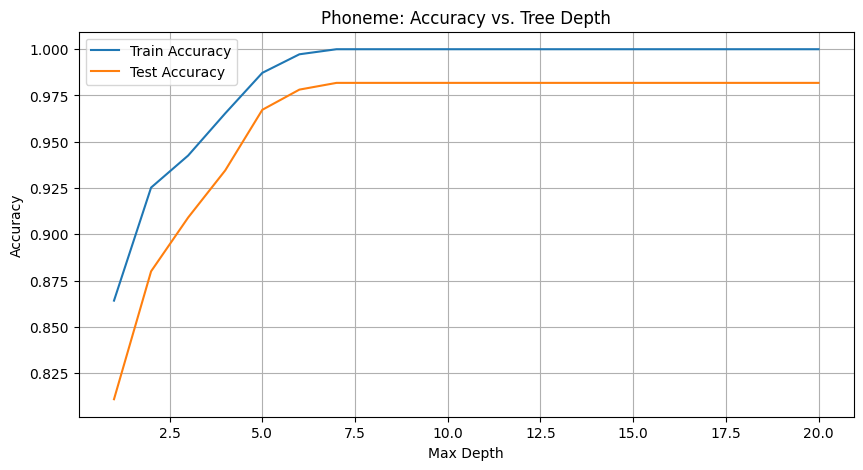

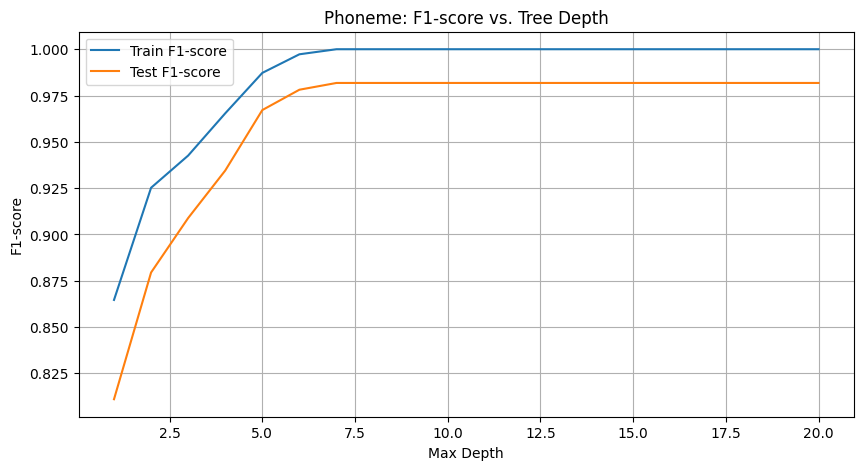

Оптимальная глубина по Accuracy: 7
Оптимальная глубина по F1-score: 7
Accuracy на всём датасете: 1.0000
F1-score на всём датасете: 1.0000


In [17]:

!pip install openml

import openml
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

# Загрузка датасета
dataset = openml.datasets.get_dataset(1462)
X, y, _, _ = dataset.get_data(target=dataset.default_target_attribute)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
depths = range(1, 21)
train_acc, test_acc = [], []
train_f1, test_f1 = [], []

for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))
    train_f1.append(f1_score(y_train, y_train_pred, average='weighted'))
    test_f1.append(f1_score(y_test, y_test_pred, average='weighted'))

# Визуализация Accuracy
plt.figure(figsize=(10, 5))
plt.plot(depths, train_acc, label='Train Accuracy')
plt.plot(depths, test_acc, label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Phoneme: Accuracy vs. Tree Depth')
plt.legend()
plt.grid(True)
plt.show()

# Визуализация F1-score
plt.figure(figsize=(10, 5))
plt.plot(depths, train_f1, label='Train F1-score')
plt.plot(depths, test_f1, label='Test F1-score')
plt.xlabel('Max Depth')
plt.ylabel('F1-score')
plt.title('Phoneme: F1-score vs. Tree Depth')
plt.legend()
plt.grid(True)
plt.show()

optimal_depth_acc = depths[test_acc.index(max(test_acc))]
optimal_depth_f1 = depths[test_f1.index(max(test_f1))]

print(f"Оптимальная глубина по Accuracy: {optimal_depth_acc}")
print(f"Оптимальная глубина по F1-score: {optimal_depth_f1}")

# Обучение модели на всём датасете с оптимальной глубиной по F1-score
clf_full = DecisionTreeClassifier(max_depth=optimal_depth_f1, random_state=42)
clf_full.fit(X, y)
y_pred_full = clf_full.predict(X)

accuracy_full = accuracy_score(y, y_pred_full)
f1_full = f1_score(y, y_pred_full, average='weighted')

print(f"Accuracy на всём датасете: {accuracy_full:.4f}")
print(f"F1-score на всём датасете: {f1_full:.4f}")


**Mammographic Mass: ID 45557**

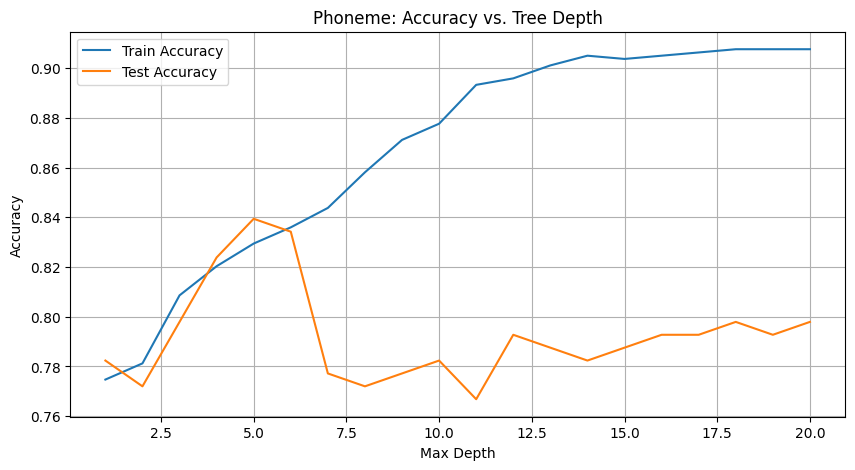

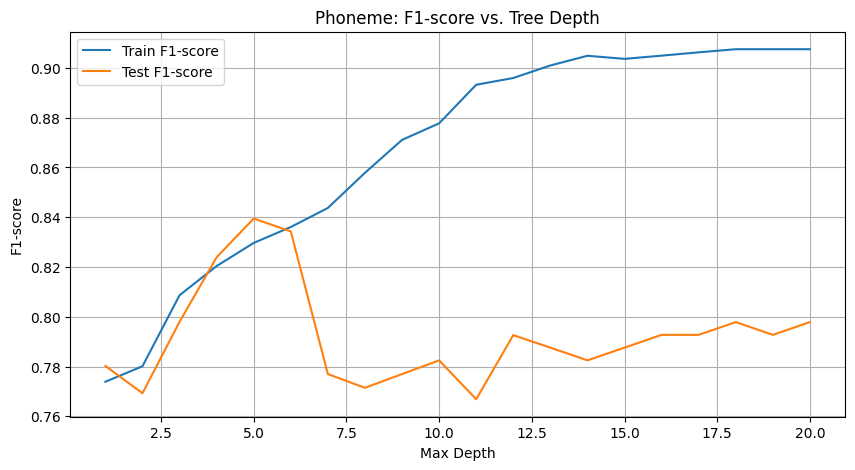

Оптимальная глубина по Accuracy: 5
Оптимальная глубина по F1-score: 5
Accuracy на всём датасете: 0.8345
F1-score на всём датасете: 0.8348


In [18]:

!pip install openml

import openml
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

# Загрузка датасета
dataset = openml.datasets.get_dataset(45557)
X, y, _, _ = dataset.get_data(target=dataset.default_target_attribute)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
depths = range(1, 21)
train_acc, test_acc = [], []
train_f1, test_f1 = [], []

for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))
    train_f1.append(f1_score(y_train, y_train_pred, average='weighted'))
    test_f1.append(f1_score(y_test, y_test_pred, average='weighted'))

# Визуализация Accuracy
plt.figure(figsize=(10, 5))
plt.plot(depths, train_acc, label='Train Accuracy')
plt.plot(depths, test_acc, label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Phoneme: Accuracy vs. Tree Depth')
plt.legend()
plt.grid(True)
plt.show()

# Визуализация F1-score
plt.figure(figsize=(10, 5))
plt.plot(depths, train_f1, label='Train F1-score')
plt.plot(depths, test_f1, label='Test F1-score')
plt.xlabel('Max Depth')
plt.ylabel('F1-score')
plt.title('Phoneme: F1-score vs. Tree Depth')
plt.legend()
plt.grid(True)
plt.show()

optimal_depth_acc = depths[test_acc.index(max(test_acc))]
optimal_depth_f1 = depths[test_f1.index(max(test_f1))]

print(f"Оптимальная глубина по Accuracy: {optimal_depth_acc}")
print(f"Оптимальная глубина по F1-score: {optimal_depth_f1}")

# Обучение модели на всём датасете с оптимальной глубиной по F1-score
clf_full = DecisionTreeClassifier(max_depth=optimal_depth_f1, random_state=42)
clf_full.fit(X, y)
y_pred_full = clf_full.predict(X)

accuracy_full = accuracy_score(y, y_pred_full)
f1_full = f1_score(y, y_pred_full, average='weighted')

print(f"Accuracy на всём датасете: {accuracy_full:.4f}")
print(f"F1-score на всём датасете: {f1_full:.4f}")


**Electricity: ID 151**

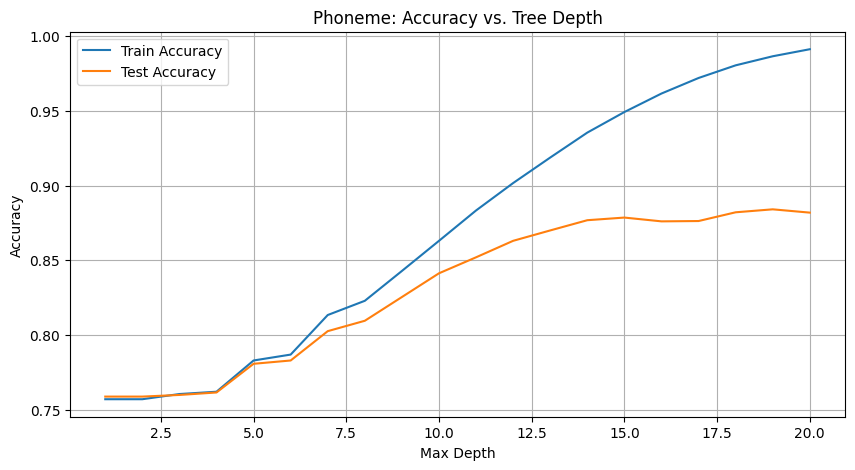

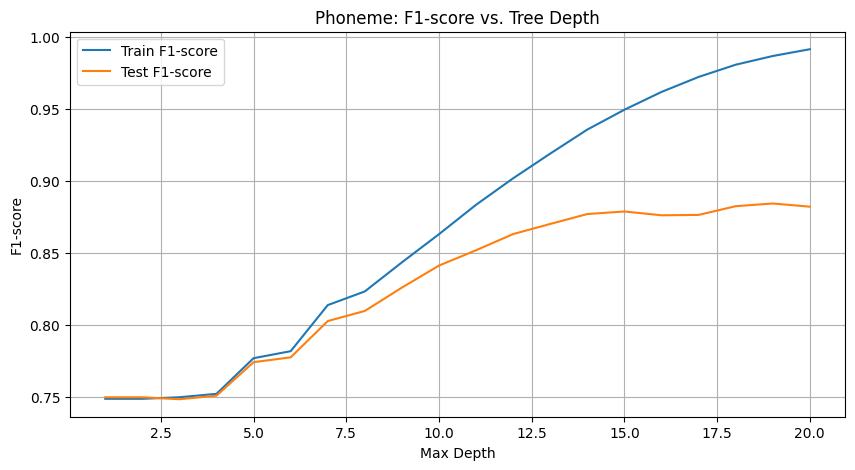

Оптимальная глубина по Accuracy: 19
Оптимальная глубина по F1-score: 19
Accuracy на всём датасете: 0.9805
F1-score на всём датасете: 0.9805


In [19]:

!pip install openml

import openml
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

# Загрузка датасета
dataset = openml.datasets.get_dataset(151)
X, y, _, _ = dataset.get_data(target=dataset.default_target_attribute)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
depths = range(1, 21)
train_acc, test_acc = [], []
train_f1, test_f1 = [], []

for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))
    train_f1.append(f1_score(y_train, y_train_pred, average='weighted'))
    test_f1.append(f1_score(y_test, y_test_pred, average='weighted'))

# Визуализация Accuracy
plt.figure(figsize=(10, 5))
plt.plot(depths, train_acc, label='Train Accuracy')
plt.plot(depths, test_acc, label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Phoneme: Accuracy vs. Tree Depth')
plt.legend()
plt.grid(True)
plt.show()

# Визуализация F1-score
plt.figure(figsize=(10, 5))
plt.plot(depths, train_f1, label='Train F1-score')
plt.plot(depths, test_f1, label='Test F1-score')
plt.xlabel('Max Depth')
plt.ylabel('F1-score')
plt.title('Phoneme: F1-score vs. Tree Depth')
plt.legend()
plt.grid(True)
plt.show()

optimal_depth_acc = depths[test_acc.index(max(test_acc))]
optimal_depth_f1 = depths[test_f1.index(max(test_f1))]

print(f"Оптимальная глубина по Accuracy: {optimal_depth_acc}")
print(f"Оптимальная глубина по F1-score: {optimal_depth_f1}")

# Обучение модели на всём датасете с оптимальной глубиной по F1-score
clf_full = DecisionTreeClassifier(max_depth=optimal_depth_f1, random_state=42)
clf_full.fit(X, y)
y_pred_full = clf_full.predict(X)

accuracy_full = accuracy_score(y, y_pred_full)
f1_full = f1_score(y, y_pred_full, average='weighted')

print(f"Accuracy на всём датасете: {accuracy_full:.4f}")
print(f"F1-score на всём датасете: {f1_full:.4f}")


**Nursery: ID 26**

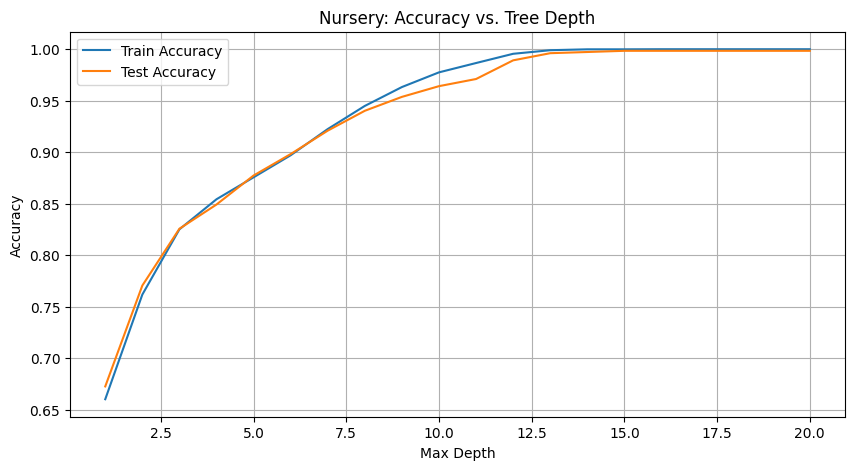

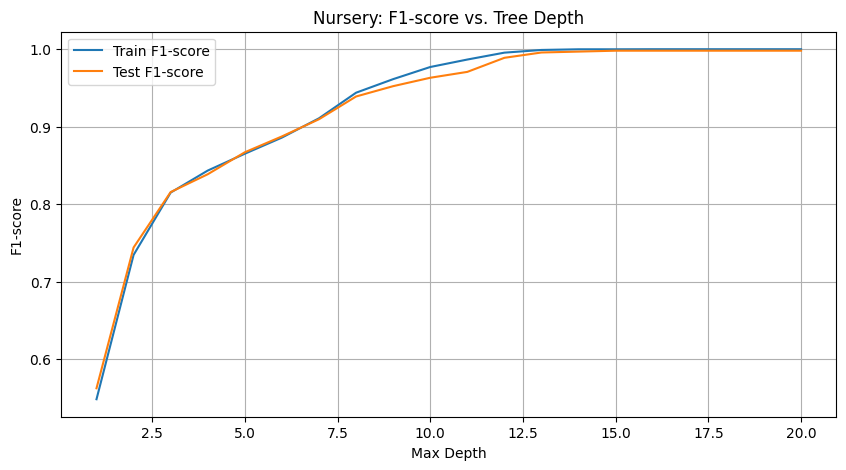

Оптимальная глубина по Accuracy: 15
Оптимальная глубина по F1-score: 15
Accuracy на всём датасете: 1.0000
F1-score на всём датасете: 1.0000


In [21]:
!pip install openml

import openml
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

# Загрузка датасета nursery (ID 26)
dataset = openml.datasets.get_dataset(26)
X, y, _, _ = dataset.get_data(target=dataset.default_target_attribute)

# Преобразование категориальных признаков в числовые через one-hot кодирование
X = pd.get_dummies(X)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

depths = range(1, 21)
train_acc, test_acc = [], []
train_f1, test_f1 = [], []

for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))
    train_f1.append(f1_score(y_train, y_train_pred, average='weighted'))
    test_f1.append(f1_score(y_test, y_test_pred, average='weighted'))

# Визуализация Accuracy
plt.figure(figsize=(10, 5))
plt.plot(depths, train_acc, label='Train Accuracy')
plt.plot(depths, test_acc, label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Nursery: Accuracy vs. Tree Depth')
plt.legend()
plt.grid(True)
plt.show()

# Визуализация F1-score
plt.figure(figsize=(10, 5))
plt.plot(depths, train_f1, label='Train F1-score')
plt.plot(depths, test_f1, label='Test F1-score')
plt.xlabel('Max Depth')
plt.ylabel('F1-score')
plt.title('Nursery: F1-score vs. Tree Depth')
plt.legend()
plt.grid(True)
plt.show()

optimal_depth_acc = depths[test_acc.index(max(test_acc))]
optimal_depth_f1 = depths[test_f1.index(max(test_f1))]

print(f"Оптимальная глубина по Accuracy: {optimal_depth_acc}")
print(f"Оптимальная глубина по F1-score: {optimal_depth_f1}")

# Обучение модели на всём датасете с оптимальной глубиной по F1-score
clf_full = DecisionTreeClassifier(max_depth=optimal_depth_f1, random_state=42)
clf_full.fit(X, y)
y_pred_full = clf_full.predict(X)

accuracy_full = accuracy_score(y, y_pred_full)
f1_full = f1_score(y, y_pred_full, average='weighted')

print(f"Accuracy на всём датасете: {accuracy_full:.4f}")
print(f"F1-score на всём датасете: {f1_full:.4f}")
